# Визуализация данных

In [1]:
from sklearn import datasets
import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Загрузка данных

In [3]:
digits = datasets.load_digits()
print digits.DESCR

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [4]:
print "target ", digits.target[0]
print "features ", digits.data[0]
print "Number of features", len(digits.data[0])

target  0
features  [  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
Number of features 64


# Визуализация объектов выборки

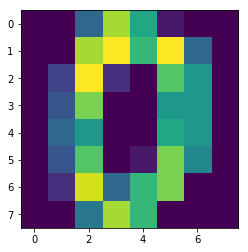

In [5]:
pylab.imshow(digits.data[0].reshape(8, 8))

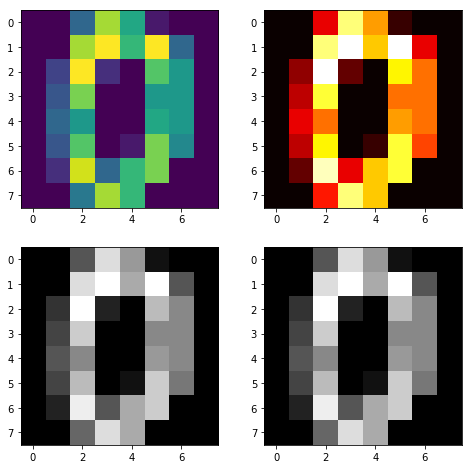

In [6]:
# изображение не очень красивое давайте изменим
pyplot.figure(figsize (8, 8))

pyplot.subplot (2,2,1)
pyplot.imshow(digits.data[0].reshape(8, 8))

pyplot.subplot (2,2,2)
pyplot.imshow(digits.data[0].reshape(8, 8), cmap = 'hot')


pyplot.subplot (2,2,3)
pyplot.imshow(digits.data[0].reshape(8, 8), cmap = 'gray')


pyplot.subplot (2,2,4)
pyplot.imshow(digits.data[0].reshape(8, 8), cmap = 'gray', interpolation ='nearest')


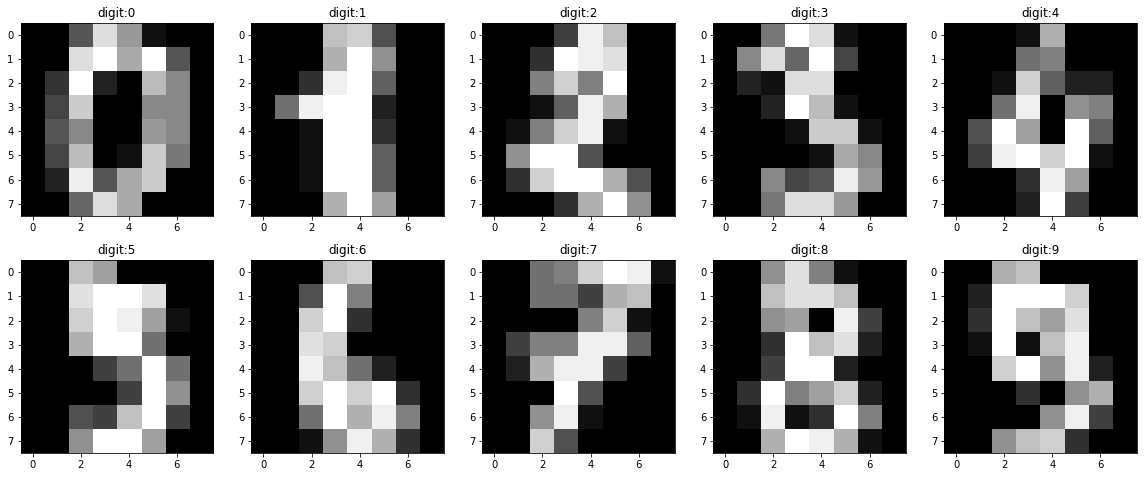

In [7]:
pyplot.figure(figsize (20, 8))

for plot_number, plot in enumerate(digits.images[:10]):
    pyplot.subplot (2, 5, plot_number + 1)
    pyplot.imshow(plot, cmap='gray')
    pyplot.title('digit:'+ str(digits.target[plot_number]))

# Уменьшение размерности

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from collections import Counter

In [9]:
# для скорости уменьшим объем данных
data = digits.data[:1000]
label = digits.target[:1000]
# проверка сбалансированости классов в выборке
print (Counter(label))

Counter({3: 104, 1: 102, 6: 101, 2: 100, 5: 100, 0: 99, 7: 99, 9: 99, 4: 98, 8: 98})


<Container object of 10 artists>

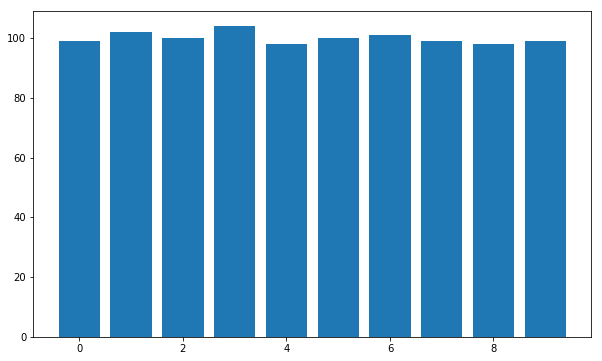

In [10]:
# гистограмма сбалансированности классов
pylab.figure (figsize = (10, 6))
pylab.bar (Counter(label).keys(), Counter(label).values())

In [11]:
# учитывая то что далее будем смотреть на 
# плоскости объекты построим метрический классификатор

classifier = KNeighborsClassifier()
classifier.fit(data, label)
print (classification_report(classifier.predict(data), label))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        99
          1       1.00      0.97      0.99       105
          2       1.00      1.00      1.00       100
          3       1.00      0.98      0.99       106
          4       1.00      1.00      1.00        98
          5       0.99      1.00      0.99        99
          6       1.00      1.00      1.00       101
          7       0.99      0.99      0.99        99
          8       0.97      0.99      0.98        96
          9       0.96      0.98      0.97        97

avg / total       0.99      0.99      0.99      1000



# RANDOM PROJECTION
линейные методы понижения размерностей - СЛУЧАЙНЫЕ ПРОЭКЦИИ

             precision    recall  f1-score   support

          0       0.74      0.47      0.58       154
          1       0.75      0.58      0.65       131
          2       0.67      0.59      0.63       113
          3       0.71      0.51      0.60       144
          4       0.38      0.56      0.45        66
          5       0.42      0.53      0.47        79
          6       0.52      0.57      0.55        93
          7       0.35      0.51      0.42        69
          8       0.37      0.58      0.45        62
          9       0.62      0.69      0.65        89

avg / total       0.60      0.55      0.56      1000



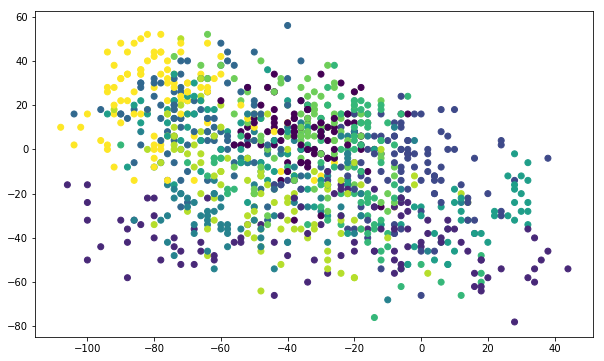

In [14]:
# перейдем в новое пространство отображения
# и проверим качество отображения классов в нем
from sklearn import random_projection

projection = random_projection.SparseRandomProjection(n_components=2, random_state=0)
data_2d_rp = projection.fit_transform(data)

pylab.figure (figsize = (10, 6))
pylab.scatter(data_2d_rp[:, 0], data_2d_rp[:, 1], c=label)

#обучим классификатор для оценки качества. Качество(f1) порядка 50%
classifier.fit(data_2d_rp, label)
print classification_report(classifier.predict(data_2d_rp), label)


# PCA  
метод главных компонент

C:\Users\semen\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


             precision    recall  f1-score   support

          0       0.83      0.73      0.77       113
          1       0.56      0.54      0.55       105
          2       0.59      0.56      0.58       105
          3       0.77      0.79      0.78       101
          4       0.95      0.93      0.94       100
          5       0.56      0.54      0.55       104
          6       0.92      0.93      0.93       100
          7       0.75      0.71      0.73       104
          8       0.62      0.66      0.64        92
          9       0.52      0.67      0.58        76

avg / total       0.71      0.71      0.71      1000



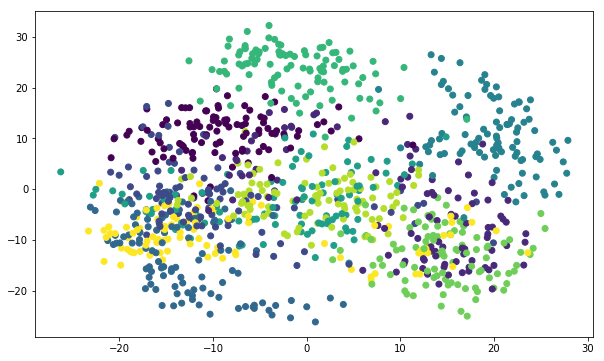

In [17]:
from sklearn.decomposition import RandomizedPCA

pca = RandomizedPCA(n_components = 2, random_state = 0)
data_2d_pca  = pca.fit_transform(data)

pylab.figure (figsize = (10, 6))
pylab.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], c=label)

#обучим классификатор для оценки качества. Качество(f1) порядка 70%
classifier.fit(data_2d_pca, label)
print classification_report(classifier.predict(data_2d_pca), label)


# MDS

Нелинейный метод MultiDimensional Scalling

             precision    recall  f1-score   support

          0       0.98      0.93      0.96       104
          1       0.85      0.71      0.77       123
          2       0.79      0.74      0.76       107
          3       0.79      0.69      0.74       118
          4       0.77      0.69      0.73       108
          5       0.39      0.61      0.48        64
          6       0.79      0.82      0.81        97
          7       0.34      0.51      0.41        67
          8       0.85      0.77      0.81       108
          9       0.68      0.64      0.66       104

avg / total       0.75      0.72      0.73      1000



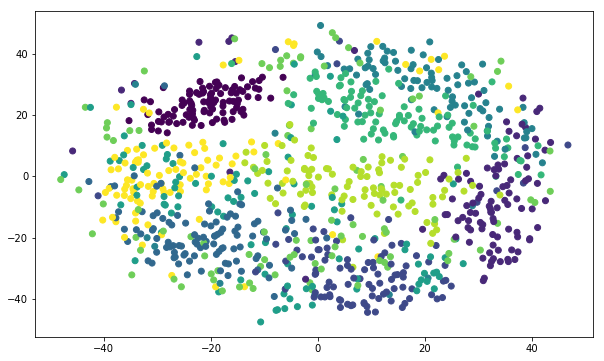

In [19]:
from sklearn import manifold

mds = manifold.MDS(n_components = 2, n_init = 1, max_iter =100)
data_2d_mds = mds.fit_transform(data)

pylab.figure (figsize = (10, 6))
pylab.scatter(data_2d_mds[:, 0], data_2d_mds[:, 1], c=label)

#обучим классификатор для оценки качества. Качество(f1) порядка 70%
classifier.fit(data_2d_mds, label)
print classification_report(classifier.predict(data_2d_mds), label)


# t-SNE

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        99
          1       0.99      0.98      0.99       103
          2       1.00      1.00      1.00       100
          3       1.00      0.98      0.99       106
          4       1.00      1.00      1.00        98
          5       0.99      0.99      0.99       100
          6       0.99      1.00      1.00       100
          7       0.99      0.99      0.99        99
          8       0.98      0.99      0.98        97
          9       0.97      0.98      0.97        98

avg / total       0.99      0.99      0.99      1000



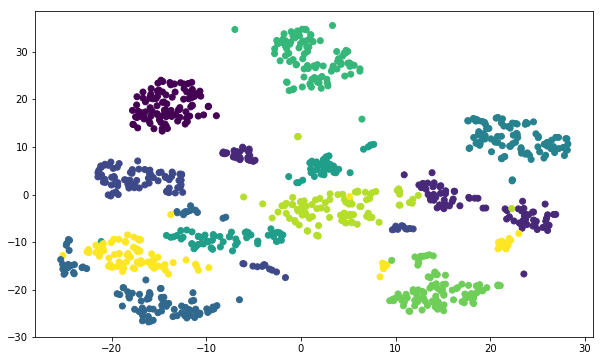

In [22]:
from sklearn import manifold

t_sne = manifold.TSNE(n_components = 2, init = 'pca', random_state =0)
data_2d_tsne = t_sne.fit_transform(data)

pylab.figure (figsize = (10, 6))
pylab.scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1], c=label)

#обучим классификатор для оценки качества. Качество(f1) порядка 99%
classifier.fit(data_2d_tsne, label)
print classification_report(classifier.predict(data_2d_tsne), label)
